<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/Fuzzing_Kitsune_Network_Attack_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve

# representation of model layers
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/kitsune_binary_data_1MFuzzing_dataset.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,156.855595,1333.814248,184757.973195,272.453568,1338.232222,180376.204347,839.245762,1341.343637,178428.451697,6413.110735,...,0.000000e+00,3743.332231,1341.942024,423.987317,1341.942024,179765.244670,0.000000e+00,0.000000e+00,26562,0.0
1,177.821845,1302.447238,140499.616788,298.805342,1304.926665,135273.604567,878.242858,1304.982763,132044.133830,8142.817955,...,0.000000e+00,6775.976526,1342.529299,419.521803,1342.529299,175998.543329,0.000000e+00,0.000000e+00,51210,0.0
2,195.010313,1353.269421,166172.901480,309.245839,1348.847594,172296.489697,868.681507,1341.857631,180714.734950,8450.849013,...,0.000000e+00,27782.864007,1341.084266,425.085782,1341.084266,180697.922335,0.000000e+00,0.000000e+00,857801,0.0
3,188.098696,1311.649872,129277.602256,309.681039,1311.825225,126831.359793,889.503564,1309.649024,128031.396884,8720.315573,...,0.000000e+00,28149.092585,1336.581170,425.506198,1336.581170,181055.524472,0.000000e+00,0.000000e+00,1559267,0.0
4,136.587984,1315.911013,212019.384261,246.516722,1323.665917,202193.641278,805.839622,1333.492042,189313.655671,8373.781176,...,0.000000e+00,28007.569570,1341.433960,424.851521,1341.433960,180498.814502,0.000000e+00,0.000000e+00,1308091,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22437,169.718498,1340.484352,177352.879434,282.687569,1343.209291,176207.862165,841.198398,1343.128280,178474.174714,8418.129504,...,0.000000e+00,28055.881916,1341.180661,425.355556,1341.180661,180927.349238,0.000000e+00,0.000000e+00,1933386,1.0
22438,167.487371,1295.502577,154407.246071,287.293347,1296.400858,149457.636470,875.941566,1299.131452,141883.655838,8730.858314,...,0.000000e+00,28152.524948,1336.383585,425.777872,1336.383585,181286.796190,0.000000e+00,0.000000e+00,1445047,1.0
22439,198.304186,1337.447541,191518.762058,305.452419,1335.775198,190386.715754,859.310483,1336.385524,186082.081209,8445.066528,...,0.000000e+00,28046.100571,1340.806814,425.639648,1340.806814,181169.110036,0.000000e+00,0.000000e+00,1852020,1.0
22440,31.262256,62.682143,353.958393,50.691446,62.264458,291.509767,146.178546,61.184825,139.369580,1426.188915,...,2.880889e-08,14027.364728,60.000000,0.000006,1231.823553,53257.110270,1.659651e-11,1.149989e-08,1346914,1.0


In [4]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

0.0    0.807147
1.0    0.192853
Name: label, dtype: float64

In [5]:
model_name_suffix = "_kitsune_Fuzzing"

In [6]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 0
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [7]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,156.855595,1333.814248,184757.973195,272.453568,1338.232222,180376.204347,839.245762,1341.343637,178428.451697,6413.110735,...,0.000000e+00,3743.332231,1341.942024,423.987317,1341.942024,179765.244670,0.000000e+00,0.000000e+00,26562,0.0
1,177.821845,1302.447238,140499.616788,298.805342,1304.926665,135273.604567,878.242858,1304.982763,132044.133830,8142.817955,...,0.000000e+00,6775.976526,1342.529299,419.521803,1342.529299,175998.543329,0.000000e+00,0.000000e+00,51210,0.0
2,195.010313,1353.269421,166172.901480,309.245839,1348.847594,172296.489697,868.681507,1341.857631,180714.734950,8450.849013,...,0.000000e+00,27782.864007,1341.084266,425.085782,1341.084266,180697.922335,0.000000e+00,0.000000e+00,857801,0.0
3,188.098696,1311.649872,129277.602256,309.681039,1311.825225,126831.359793,889.503564,1309.649024,128031.396884,8720.315573,...,0.000000e+00,28149.092585,1336.581170,425.506198,1336.581170,181055.524472,0.000000e+00,0.000000e+00,1559267,0.0
4,136.587984,1315.911013,212019.384261,246.516722,1323.665917,202193.641278,805.839622,1333.492042,189313.655671,8373.781176,...,0.000000e+00,28007.569570,1341.433960,424.851521,1341.433960,180498.814502,0.000000e+00,0.000000e+00,1308091,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22437,169.718498,1340.484352,177352.879434,282.687569,1343.209291,176207.862165,841.198398,1343.128280,178474.174714,8418.129504,...,0.000000e+00,28055.881916,1341.180661,425.355556,1341.180661,180927.349238,0.000000e+00,0.000000e+00,1933386,1.0
22438,167.487371,1295.502577,154407.246071,287.293347,1296.400858,149457.636470,875.941566,1299.131452,141883.655838,8730.858314,...,0.000000e+00,28152.524948,1336.383585,425.777872,1336.383585,181286.796190,0.000000e+00,0.000000e+00,1445047,1.0
22439,198.304186,1337.447541,191518.762058,305.452419,1335.775198,190386.715754,859.310483,1336.385524,186082.081209,8445.066528,...,0.000000e+00,28046.100571,1340.806814,425.639648,1340.806814,181169.110036,0.000000e+00,0.000000e+00,1852020,1.0
22440,31.262256,62.682143,353.958393,50.691446,62.264458,291.509767,146.178546,61.184825,139.369580,1426.188915,...,2.880889e-08,14027.364728,60.000000,0.000006,1231.823553,53257.110270,1.659651e-11,1.149989e-08,1346914,1.0


In [8]:
number_of_cols = bin_data.shape[1]

In [9]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

0.0    0.807147
1.0    0.192853
Name: label, dtype: float64

In [10]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [11]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [12]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [13]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
5975,0.110474,0.000338,0.000046,0.130501,0.000440,0.000054,0.154339,0.000451,0.000092,0.162370,...,0.451932,0.449341,1.332268e-15,1.848206e-09,0.905317,0.198875,0.833528,0.728881,0.469218,0.0
9698,0.575951,0.961402,0.353665,0.703392,0.961416,0.338143,0.880259,0.964982,0.432851,0.978708,...,0.472340,0.825003,9.903718e-01,8.130646e-01,0.990372,0.661074,0.567928,0.485739,0.197906,0.0
21911,0.630502,0.968609,0.569200,0.742437,0.977272,0.512854,0.885092,0.989823,0.614979,0.955825,...,0.472340,0.908707,9.894438e-01,8.255333e-01,0.989444,0.681505,0.567928,0.485739,0.753014,1.0
20142,0.884045,0.994619,0.484878,0.911936,0.994806,0.461707,0.945516,0.995549,0.596584,0.961749,...,0.472340,0.909069,9.897126e-01,8.246921e-01,0.989713,0.680117,0.567928,0.485739,0.831171,1.0
13954,0.518538,0.937596,0.696532,0.650543,0.956375,0.592511,0.843745,0.979400,0.670169,0.949421,...,0.472340,0.905567,9.898716e-01,8.241409e-01,0.989872,0.679208,0.567928,0.485739,0.495092,0.0


In [14]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
134,-0.000025,0.000469,0.072234,0.000024,0.000473,0.068096,0.000280,0.000477,0.064601,0.003783,...,-0.000098,0.012028,0.000498,0.000090,0.000498,0.079834,-0.000098,-0.000098,0.284208,0.0
6631,-0.000086,-0.000071,0.000081,-0.000078,-0.000071,0.000042,-0.000036,-0.000071,-0.000034,0.000533,...,-0.000098,0.006143,-0.000072,-0.000098,0.000451,0.023397,-0.000098,-0.000098,0.670116,0.0
12551,-0.000028,0.000472,0.068439,0.000024,0.000474,0.067099,0.000284,0.000477,0.064613,0.003793,...,-0.000098,0.012459,0.000497,0.000092,0.000497,0.081076,-0.000098,-0.000098,0.972258,0.0
3394,-0.000084,-0.000072,-0.000098,-0.000075,-0.000072,-0.000098,-0.000034,-0.000072,-0.000091,0.000536,...,-0.000098,0.006180,-0.000072,-0.000098,0.000450,0.023799,-0.000098,-0.000098,0.927078,0.0
21141,-0.000039,0.000499,0.077702,0.000010,0.000498,0.079689,0.000261,0.000499,0.081208,0.003646,...,-0.000098,0.012403,0.000499,0.000091,0.000499,0.080622,-0.000098,-0.000098,0.873440,1.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [15]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [16]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary"+model_name_suffix+".pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [17]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  85.58189271074674


In [18]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

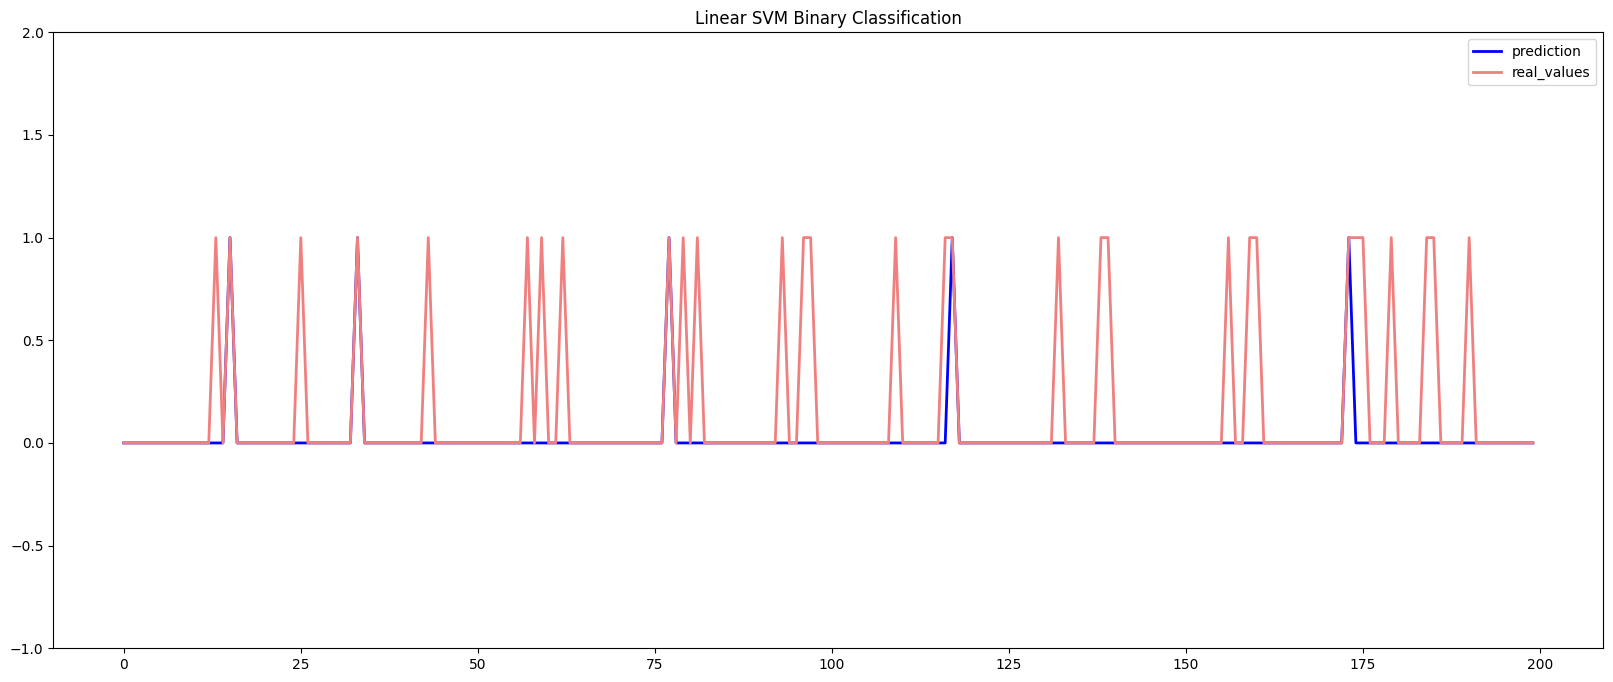

In [19]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [20]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))
  fpr, fnr, thresholds = det_curve(y_test, y_pred)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

              precision    recall  f1-score   support

     class 0       0.85      1.00      0.92      4558
     class 1       1.00      0.23      0.38      1053

    accuracy                           0.86      5611
   macro avg       0.92      0.62      0.65      5611
weighted avg       0.88      0.86      0.82      5611

False Positive Rate -  [1. 0.]
False Negative Rate -  [0.        0.7682811]
Thresholds -  [0. 1.]


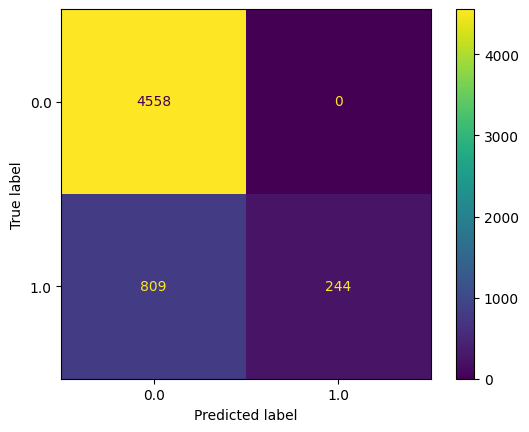

In [21]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [22]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [23]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5900      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [25]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 6s 153ms/step - loss: 0.7294 - accuracy: 0.4320 - val_loss: 0.5842 - val_accuracy: 0.7971
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 0.5461 - accuracy: 0.8075 - val_loss: 0.5107 - val_accuracy: 0.7971
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.4952 - accuracy: 0.8075 - val_loss: 0.5172 - val_accuracy: 0.7971
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.4999 - accuracy: 0.8075 - val_loss: 0.5213 - val_accuracy: 0.7971
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.4967 - accuracy: 0.8075 - val_loss: 0.5047 - val_accuracy: 0.7971
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 0.4804 - accuracy: 0.8075 - val_loss: 0.4866 - val_accuracy: 0.7971
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.4680 - accuracy: 0.8075 - val_loss: 0.4765 - val_accuracy: 0.7971
Epoch 8/100
3/3 [==

In [26]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [27]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

176/176 [==============================] - 1s 2ms/step - loss: 876325.7500 - accuracy: 0.8123
Test results - Loss: 876325.75 - Accuracy: 81.23329281806946


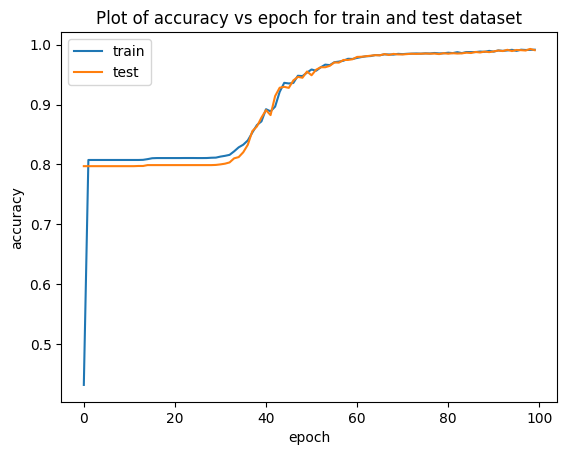

In [29]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

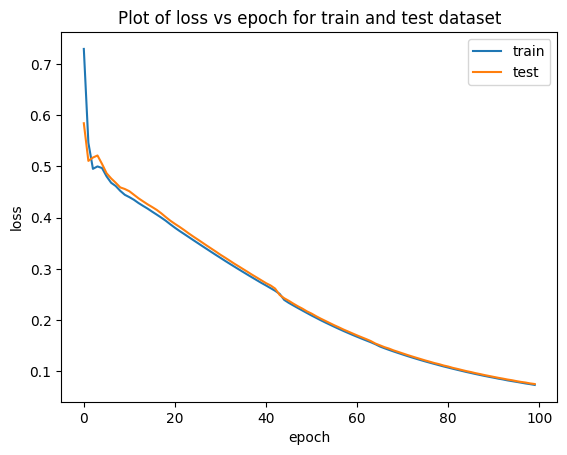

In [30]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [31]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [32]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

176/176 [==============================] - 0s 1ms/step


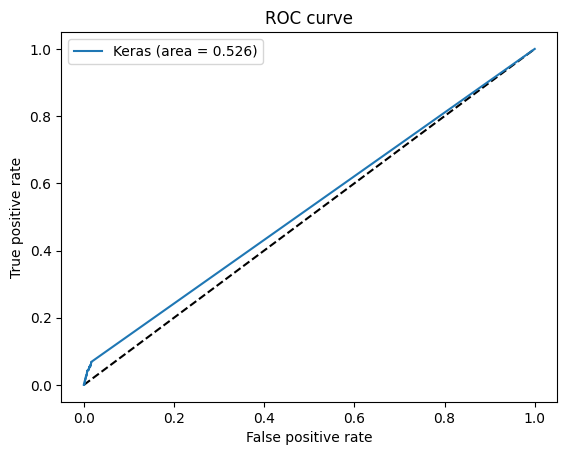

In [33]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [34]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [35]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

176/176 [==============================] - 0s 2ms/step


In [36]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.0
F1 Score -  0.0
Precision Score -  0.0
False Positive Rate -  [1.]
False Negative Rate -  [0.]
Thresholds -  [0]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90      4558
           1       0.00      0.00      0.00      1053

    accuracy                           0.81      5611
   macro avg       0.41      0.50      0.45      5611
weighted avg       0.66      0.81      0.73      5611



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


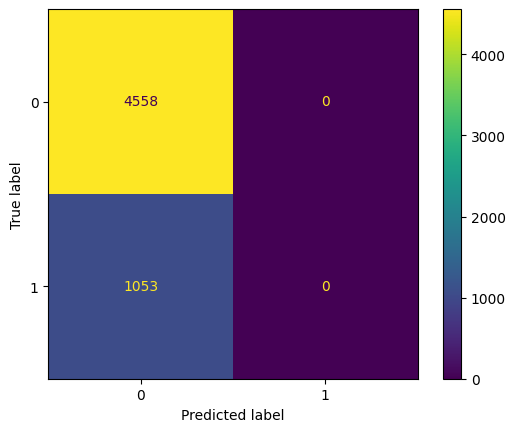

In [37]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [38]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X3            0.304322
X18           0.304322
X6            0.307392
X21           0.307392
X9            0.308889
X24           0.308889
X27           0.315424
X12           0.315424
X30           0.315603
X15           0.315603
X35           0.378387
X42           0.402133
X49           0.425821
X63           0.444247
X56           0.445419
Unnamed: 0    0.492370
label         1.000000
Name: label, dtype: float64

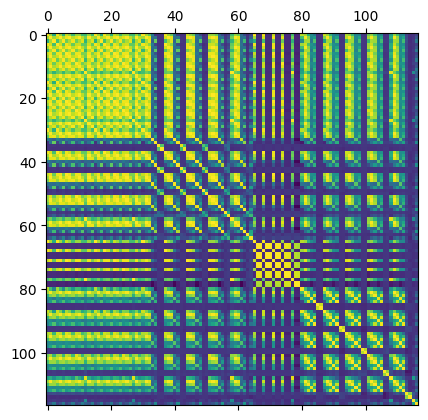

In [39]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [40]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(16831, 117)

In [41]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [42]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(16831, 1, 117)

In [43]:
x_train.shape[2]

117

In [44]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(5611, 1, 117)

In [45]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [46]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                33600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,651
Trainable params: 33,651
Non-trainable params: 0
_________________________________________________________________


In [48]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 4s 336ms/step - loss: 0.5959 - accuracy: 0.8075 - val_loss: 0.5463 - val_accuracy: 0.7971
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5249 - accuracy: 0.8075 - val_loss: 0.5189 - val_accuracy: 0.7971
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5042 - accuracy: 0.8075 - val_loss: 0.5234 - val_accuracy: 0.7971
Epoch 4/100
3/3 [==============================] - 0s 33ms/step - loss: 0.5063 - accuracy: 0.8075 - val_loss: 0.5253 - val_accuracy: 0.7971
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5042 - accuracy: 0.8075 - val_loss: 0.5171 - val_accuracy: 0.7971
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 0.4960 - accuracy: 0.8075 - val_loss: 0.5062 - val_accuracy: 0.7971
Epoch 7/100
3/3 [==============================] - 0s 36ms/step - loss: 0.4877 - accuracy: 0.8075 - val_loss: 0.4987 - val_accuracy: 0.7971
Epoch 8/100
3/3 [==

In [49]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [50]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [51]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

176/176 [==============================] - 1s 3ms/step - loss: 1.5075 - accuracy: 0.8123
Test results - Loss: 1.5074870586395264 - Accuracy: 81.23329281806946%


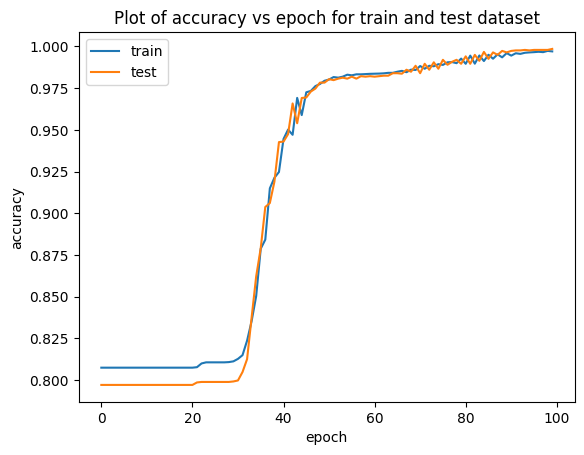

In [53]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

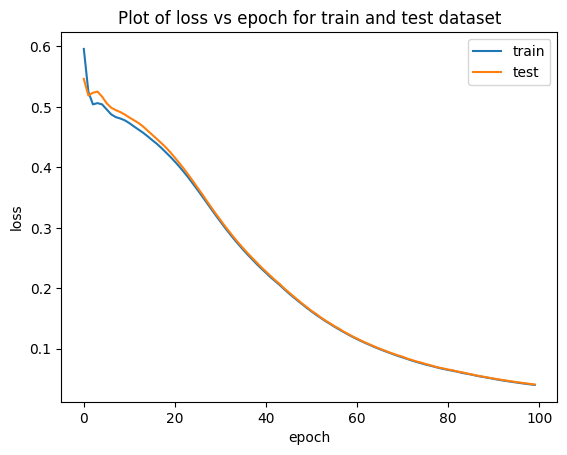

In [54]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [55]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [56]:
y_test = np.array(y_test)
y_test.shape

(5611,)

In [57]:
type(y_test)

numpy.ndarray

In [58]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

176/176 [==============================] - 1s 2ms/step


In [59]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.0
F1 Score -  0.0
Precision Score -  0.0
False Positive Rate -  [1.]
False Negative Rate -  [0.]
Thresholds -  [0]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90      4558
           1       0.00      0.00      0.00      1053

    accuracy                           0.81      5611
   macro avg       0.41      0.50      0.45      5611
weighted avg       0.66      0.81      0.73      5611



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


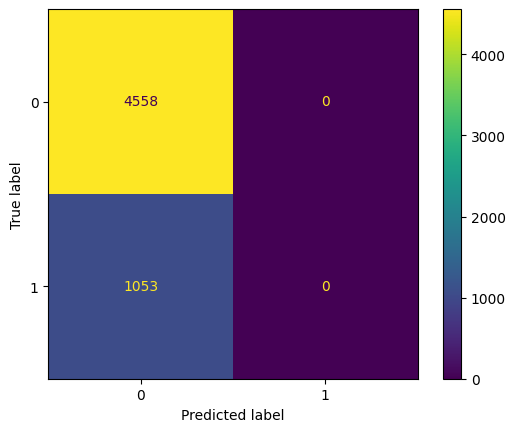

In [60]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [61]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [62]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [63]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [64]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [65]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_3 (Dense)             (None, 50)                5850      
                                                                 
 dense_4 (Dense)             (None, 116)               5916      
                                                                 
Total params: 11,766
Trainable params: 11,766
Non-trainable params: 0
_________________________________________________________________


In [66]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
34/34 [==============================] - 2s 13ms/step - loss: 0.4979 - accuracy: 5.9414e-05 - val_loss: 40322235306606592.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 0.4954 - accuracy: 0.1020 - val_loss: 40322235306606592.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 0.4947 - accuracy: 0.0973 - val_loss: 40322235306606592.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.4945 - accuracy: 0.1735 - val_loss: 40322235306606592.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.4945 - accuracy: 0.1199 - val_loss: 40322235306606592.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 0.4944 - accuracy: 0.0482 - val_loss: 40322235306606592.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
34/34 [==========

In [67]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [68]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [69]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

176/176 [==============================] - 1s 2ms/step - loss: 40322226716672000.0000 - accuracy: 0.0000e+00
Test results - Loss: 4.0322226716672e+16 - Accuracy: 0.0%


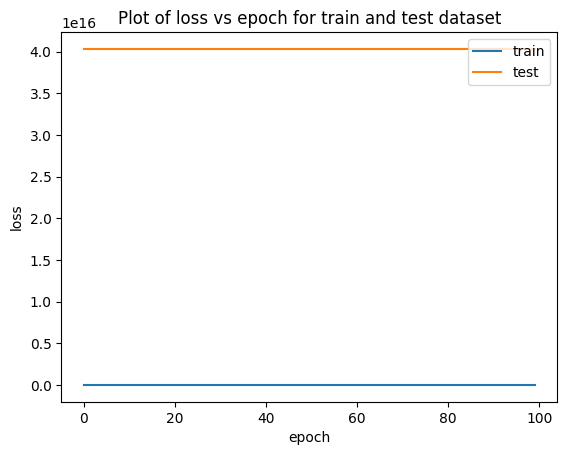

In [70]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

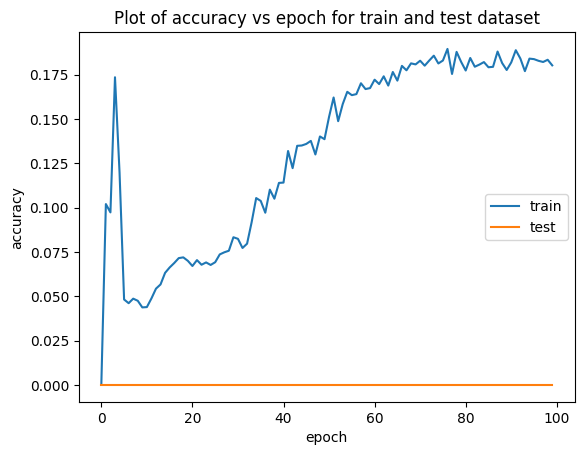

In [71]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [72]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [73]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

176/176 [==============================] - 0s 2ms/step


In [74]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [75]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(5611, 116)


## **AE Classifier**

In [76]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [77]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                5850      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
9/9 [==============================] - 1s 26ms/step - loss: 0.6009 - accuracy: 0.8115 - val_loss: 0.5673 - val_accuracy: 0.8157
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5499 - accuracy: 0.8115 - val_loss: 0.5251 - val_accuracy: 0.8157
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 0.5159 - accuracy: 0.8115 - val_loss: 0.4998 - val_accuracy: 0.8157
Epoch 4/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4979 - accuracy: 0.8115 - val_loss: 0.4862 - val_accuracy: 0.8157
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4878 - accuracy: 0.8115 - val_loss: 0.4802 - val_accuracy: 0.8157
Epoch 6/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4846 - accuracy: 0.8115 - val_loss: 0.4777 - val_accuracy: 0.8157
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4830 - accuracy: 0.8115 - val_loss: 0.4768 - val_accuracy: 0.8157
Epoch 8/300
9/9 [=========

In [80]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [81]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

176/176 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.8123
Test results - Loss: 0.49914175271987915 - Accuracy: 81.23329281806946%


In [83]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

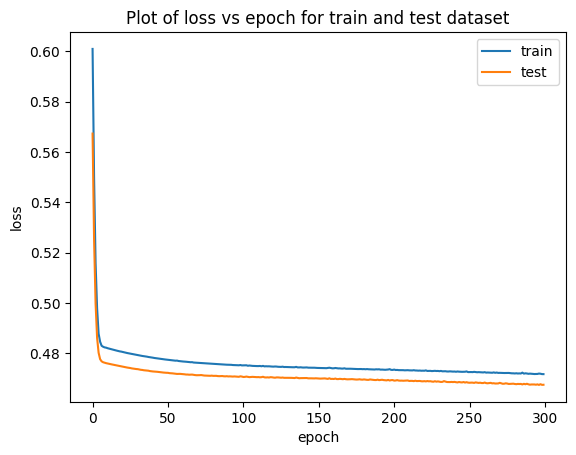

In [84]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

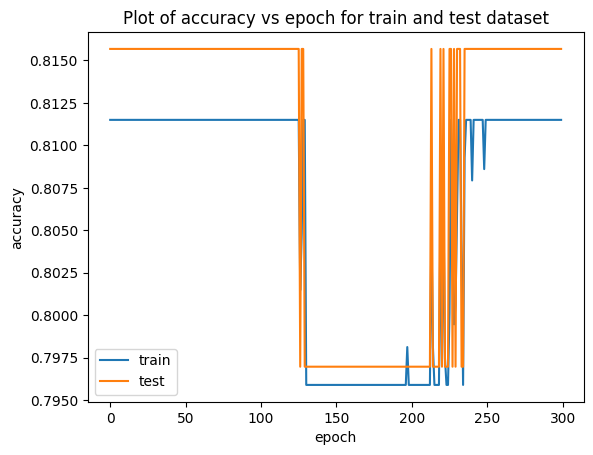

In [85]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [86]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

176/176 [==============================] - 0s 2ms/step


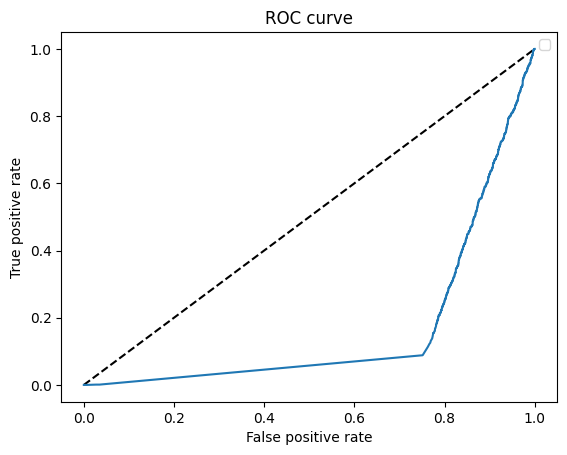

In [87]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [88]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

176/176 [==============================] - 0s 1ms/step


In [89]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.0
F1 Score -  0.0
Precision Score -  0.0
False Positive Rate -  [1.]
False Negative Rate -  [0.]
Thresholds -  [0]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90      4558
           1       0.00      0.00      0.00      1053

    accuracy                           0.81      5611
   macro avg       0.41      0.50      0.45      5611
weighted avg       0.66      0.81      0.73      5611



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


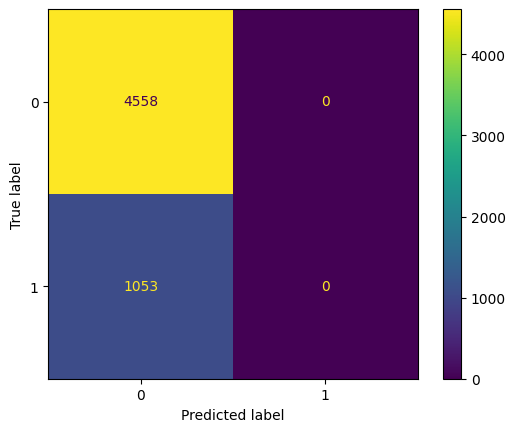

In [90]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()